<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />



In [80]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [81]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [82]:
########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('./survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [83]:
survey_df.head(n=3)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian


In [84]:
# checking information about each column
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyID                                                                      137 non-null    int64 
 1   Am the life of the party                                                      137 non-null    int64 
 2   Feel little concern for others                                                137 non-null    int64 
 3   Am always prepared                                                            137 non-null    int64 
 4   Get stressed out easily                                                       137 non-null    int64 
 5   Have a rich vocabulary                                                        137 non-null    int64 
 6   Don't talk a lot                          

In [85]:
# summary of decriptive statistics
survey_df.describe(include = 'number').round(2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

In [86]:
# Making a copy
survey_df_2 = survey_df.copy()

In [87]:
#Removing Categorical and SurveyID from Data

survey_df_new = survey_df.drop(['What laptop do you currently have?', 
                              'What laptop would you buy in next assuming if all laptops cost the same?',
                              'What program are you in?',  'What is your ethnicity?',
                               'Gender', 'What is your nationality? ', 'surveyID'],
                             axis = 1)

survey_df_new.shape

# saving to Excel
survey_df_new.to_excel('./survey_data_new.xlsx')


In [88]:
#Validating data getting rid of rows where duplicate questions answers don't make sense

for index, row in survey_df.iterrows():
    if row['Encourage direct and open discussions'] - row['Encourage direct and open discussions.1'] > 3:
        survey_df.drop(index, inplace = True)

for index, row in survey_df.iterrows():
    if row["Take initiative even when circumstances, objectives, or rules aren't clear"] - row["Take initiative even when circumstances, objectives, or rules aren't clear.1"] > 3:
        survey_df.drop(index, inplace = True)

for index, row in survey_df.iterrows():
    if row['Respond effectively to multiple priorities'] - row['Respond effectively to multiple priorities.1'] > 3:
        survey_df.drop(index, inplace = True)
    
survey_df.shape

(137, 79)

In [89]:
survey_df = survey_df.drop(["Take initiative even when circumstances, objectives, or rules aren't clear.1",
                                'Encourage direct and open discussions.1',
                                'Respond effectively to multiple priorities.1'],axis = 1)

In [90]:
#Validating data getting rid of rows where reponse is contradictory
for index, row in survey_df.iterrows():
    if row["Am not interested in other people's problems"] - row['Am interested in people'] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():
    if row["Am easily disturbed"] - row['Am relaxed most of the time'] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():
    if row["Have excellent ideas"] - row['Do not have a good imagination'] > 3:
        survey_df.drop(index, inplace = True) 
        
    

survey_df.shape

(119, 76)

In [91]:
#Validating data getting rid of rows that appear to mirror each other

for index, row in survey_df.iterrows():        
    if row["Am the life of the party"] - row["Don't mind being the center of attention"] > 3:
        survey_df.drop(index, inplace = True)
        
        
for index, row in survey_df.iterrows():        
    if row["Am not really interested in others"] - row["Am quiet around strangers"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Sympathize with others' feelings"] - row["Feel others' emotions"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Don't talk a lot"] - row["Have little to say"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Am interested in people"] - row["Feel comfortable around people"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Make a mess of things"] - row["Often forget to put things back in their proper place"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Feel little concern for others"] - row["Am not interested in other people's problems"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Like order"] - row["Follow a schedule"] > 3:
        survey_df.drop(index, inplace = True)        
        
for index, row in survey_df.iterrows():        
    if row["Change my mood a lot"] - row["Have frequent mood swings"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Keep in the background"] - row["Don't like to draw attention to myself"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Worry about things"] - row["Spend time reflecting on things"] > 3:
        survey_df.drop(index, inplace = True)        
                
for index, row in survey_df.iterrows():        
    if row["Have excellent ideas"] - row["Am full of ideas"] > 3:
        survey_df.drop(index, inplace = True)
        
for index, row in survey_df.iterrows():        
    if row["Get upset easily"] - row["Get irritated easily"] > 3:
        survey_df.drop(index, inplace = True)        
                            
for index, row in survey_df.iterrows():        
    if row["Have a rich vocabulary"] - row["Use difficult words"] > 3:
        survey_df.drop(index, inplace = True) 

In [92]:
survey_df = survey_df.drop(["Use difficult words", "Get irritated easily","Am full of ideas",
                           "Spend time reflecting on things", "Don't like to draw attention to myself",
                           "Have frequent mood swings", "Follow a schedule",
                           "Am not interested in other people's problems",
                           "Often forget to put things back in their proper place",
                           "Feel comfortable around people", "Have little to say", 
                           "Am quiet around strangers", "Feel others' emotions",
                           "Don't mind being the center of attention"],axis = 1)

<br><h2>Big 5 personality Traits</h2><br>

In [94]:
# scaling (normalizing) variables before correlation analysis



# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_df_new)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_df_new)


# converting scaled data into a DataFrame
survey_scaled = pd.DataFrame(X_scaled)


# reattaching column names
survey_scaled.columns = survey_df_new.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_df_new), '\n\n')
print(pd.np.var(survey_scaled))

Am the life of the party                                                         1.284458
Feel little concern for others                                                   1.747669
Am always prepared                                                               0.845543
Get stressed out easily                                                          1.469764
Have a rich vocabulary                                                           0.899142
Don't talk a lot                                                                 1.168842
Am interested in people                                                          0.956790
Leave my belongings around                                                       1.847515
Am relaxed most of the time                                                      1.193138
Have difficulty understanding abstract ideas                                     1.198679
Feel comfortable around people                                                   0.999094
Insult peo

<ipython-input-94-b6079fc3281b>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_df_new), '\n\n')
<ipython-input-94-b6079fc3281b>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_scaled))


In [95]:
survey_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 72 columns):
 #   Column                                                                        Non-Null Count  Dtype
---  ------                                                                        --------------  -----
 0   Am the life of the party                                                      137 non-null    int64
 1   Feel little concern for others                                                137 non-null    int64
 2   Am always prepared                                                            137 non-null    int64
 3   Get stressed out easily                                                       137 non-null    int64
 4   Have a rich vocabulary                                                        137 non-null    int64
 5   Don't talk a lot                                                              137 non-null    int64
 6   Am interested in people                           

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>PCA BIG 5<strong>
<br><br> 
    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

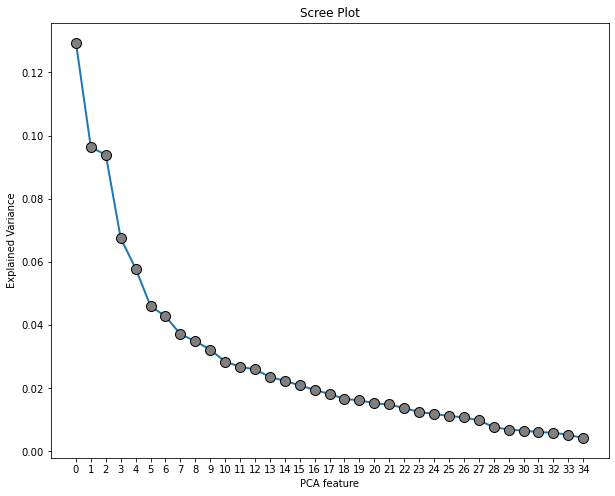

In [96]:
#Splitting for big 5 
big_5 = survey_df_new.iloc[:, 0:35]
big_5.head()

#Instantiating PCA object with no limit to principal components for BIG 5
big_5_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
personality_pca = big_5_pca.fit_transform(big_5)

#Calling scree plot function
scree_plot(pca_object = big_5_pca)


In [97]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the big_%
customer_pca_3 = pca_3.fit_transform(big_5)

In [98]:
customer_pca_3

array([[-0.32116594,  0.86217664,  0.30760084],
       [ 1.26845272,  0.72297948, -1.16685889],
       [ 0.40347284, -2.62647188, -4.5015734 ],
       [ 1.35442422, -0.94713166,  0.98724819],
       [ 3.65272905, -0.52306879,  0.48834857],
       [ 3.08136223,  2.67047471,  1.37902814],
       [ 2.57972646,  1.5547475 ,  0.82961576],
       [-2.06318997, -1.56020287, -0.42366891],
       [ 0.75713161,  1.2052086 , -1.44119225],
       [-2.61441667,  1.48550856, -0.63842081],
       [-0.28288497,  2.62867954,  2.49155165],
       [-1.24923922, -1.0083252 ,  1.47345827],
       [-2.30008759, -1.28989652, -0.12037415],
       [ 1.17206468, -0.2098323 ,  0.46275677],
       [ 0.84864052,  2.4244037 ,  0.66251886],
       [-1.26054118,  0.4388012 , -1.31550236],
       [-2.95948905, -1.61722429, -1.80954046],
       [ 4.18935033, -0.08701972,  0.83802655],
       [ 2.14722149, -1.71726346,  2.4086463 ],
       [ 0.99324529,  2.0028167 ,  4.88078397],
       [ 2.38517287,  0.78239295, -1.617

In [99]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(big_5_pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(big_5.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(big_5.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                         0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34
Am the life of the party                               0.03 -0.26  0.26  0.13  0.14 -0.23  0.22 -0.12  0.02  0.28  0.40 -0.12 -0.08 -0.11  0.15 -0.05 -0.10 -0.08  0.23  0.11  0.12  0.19 -0.04 -0.12 -0.12  0.17 -0.05 -0.07 -0.24  0.05  0.14 -0.02 -0.08 -0.36  0.00
Feel little concern for others                         0.26 -0.16 -0.11  0.17 -0.06 -0.64 -0.28 -0.03  0.16  0.13 -0.13  0.30 -0.28  0.13 -0.06  0.15 -0.00  0.07  0.00 -0.01  0.19 -0.06  0.02  0.02  0.15  0.04 -0.00  0.01  0.06  0.09 -0.02 -0.11  0.04  0.11  0.01
Am always prepared                                    -0.11 -0.02 -0.04  0.14 -0.10 -0.11  0.25 -0.16  0.02  0.12 -0.02 -0.02 -0.22 -0.35 -0.04  

<ipython-input-99-7c74b133c902>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(big_5_pca.components_))
<ipython-input-99-7c74b133c902>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


In [100]:
# naming each principal component
factor_loadings_3.columns = ['Under pressure',         # Mood swing
                             'Introvert',              # Less party
                             'Sympathetic Socializer'] # Listener


# checking the result
factor_loadings_3

,Under pressure,Introvert,Sympathetic Socializer
Am the life of the party,0.032740,-0.261034,0.259674
Feel little concern for others,0.261406,-0.155621,-0.108592
Am always prepared,-0.108092,-0.023983,-0.038947
Get stressed out easily,0.158965,0.270612,0.380421
Have a rich vocabulary,-0.170903,-0.038883,0.041049
Don't talk a lot,0.153694,0.135336,-0.186327
Am interested in people,-0.109019,-0.117404,0.223306
Leave my belongings around,0.249747,-0.315373,0.090396
Am relaxed most of the time,-0.003744,-0.287529,-0.193352
Have difficulty understanding abstract ideas,0.159286,0.086812,0.157964


In [101]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(big_5)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_3.columns


# checking the results
X_pca_df

,Under pressure,Introvert,Sympathetic Socializer
0,-0.321166,0.862177,0.307601
1,1.268453,0.722979,-1.166859
2,0.403473,-2.626472,-4.501573
3,1.354424,-0.947132,0.987248
4,3.652729,-0.523069,0.488349
5,3.081362,2.670475,1.379028
6,2.579726,1.554747,0.829616
7,-2.063190,-1.560203,-0.423669
8,0.757132,1.205209,-1.441192
9,-2.614417,1.485509,-0.638421


In [102]:
X_pca_df.to_excel('./analysis_results/PCA Factor Loadings1.xlsx',
                  index = False)

In [103]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Stressed personality',                  # Mood swing
                             'Introvert personality',           # Less party
                             'Social personality']              # Listener， Sympathetic Socializer


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Under pressure            5.027344
Introvert                 3.740423
Sympathetic Socializer    3.649699
dtype: float64 


Stressed personality     1.0
Introvert personality    1.0
Social personality       1.0
dtype: float64


<ipython-input-103-01c0fa423aaa>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-103-01c0fa423aaa>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


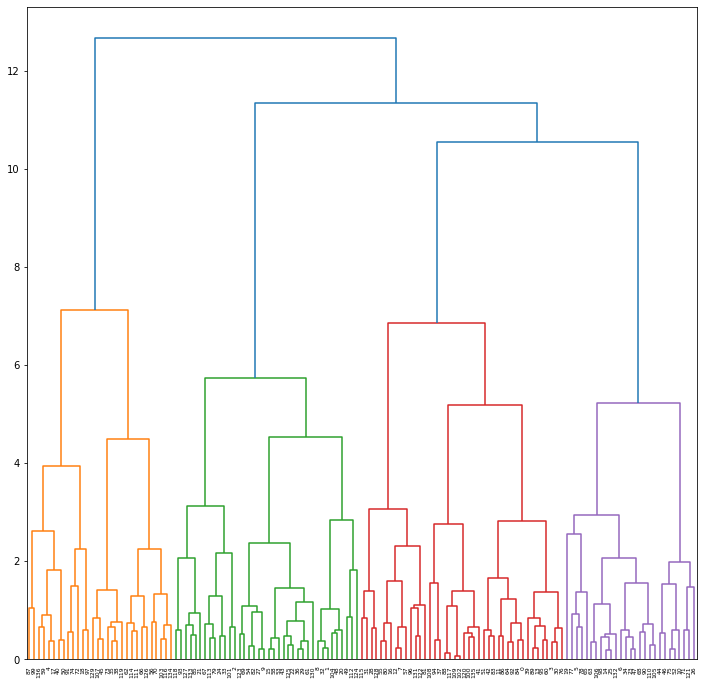

In [104]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

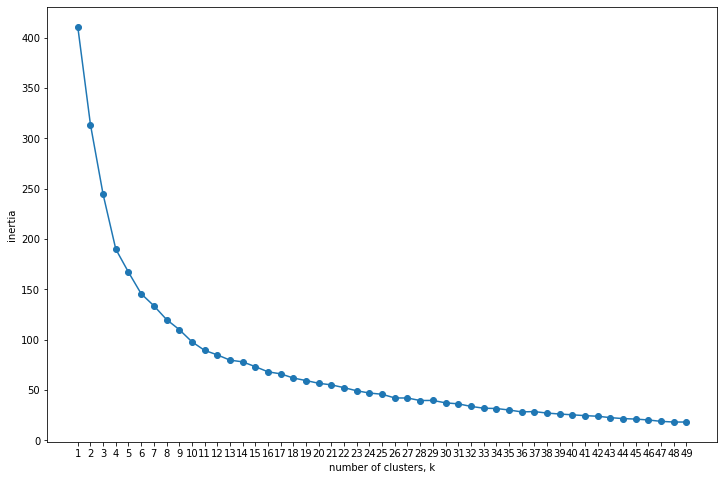

In [105]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [106]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    49
0    45
1    43
Name: Cluster, dtype: int64


In [107]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Stressful personality', # Mood swing
                             'Introvert personality', # Less party
                             'Social personality'] # Listener， Sympathetic Socializer

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Stressful personality,Introvert personality,Social personality
0,-0.87,-0.64,0.39
1,0.55,0.66,0.73
2,0.32,0.01,-1.00


<br><h3>COMPARING DEMOGRAHPIC AND NON-DEMOGRAPHIC DATA</h3><br>

In [108]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df_2.loc[ : , ['What laptop do you currently have?',
                               'What laptop would you buy in next assuming if all laptops cost the same?',
                               'What program are you in?', 'Gender', 'What is your nationality? ',
                            'What is your ethnicity?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?',
                               'What laptop would you buy in next assuming if all laptops cost the same?',
                               'What program are you in?', 'Gender', 'What is your nationality? ',
                               'What is your ethnicity?',
                               'Cluster',
                               'Stressful personality', # Mood swing
                               'Introvert personality', # Less party
                               'Social personality'] 


# checking the results
print(final_pca_clust_df)

    What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  Gender What is your nationality?  What is your ethnicity?  Cluster  Stressful personality  Introvert personality  Social personality
0                              Macbook                                                                  Macbook     DD (MIB & Business Analytics)  Female                    ecuador       Hispanic / Latino        1              -0.321166               0.862177            0.307601
1                       Windows laptop                                                           Windows laptop       One year Business Analytics    Male                    Ecuador       Hispanic / Latino        2               1.268453               0.722979           -1.166859
2                       Windows laptop                                                           Windows laptop       One year Business Analytics    Male       

In [109]:
# renaming
current_laptop_names = {1 : 'Macbook ',
                 'Windows laptop' : 'Windows'}

final_pca_clust_df['What laptop do you currently have?'].replace(current_laptop_names, inplace = True)

# renaming
future_laptop_names = {1 : 'Macbook ',
                 'Windows laptop' : 'Windows'}

final_pca_clust_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(future_laptop_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Stressful personality,Introvert personality,Social personality
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,ecuador,Hispanic / Latino,Cluster 2,-0.321166,0.862177,0.307601
1,Windows,Windows,One year Business Analytics,Male,Ecuador,Hispanic / Latino,Cluster 3,1.268453,0.722979,-1.166859
2,Windows,Windows,One year Business Analytics,Male,Indian,West Asian / Indian,Cluster 3,0.403473,-2.626472,-4.501573
3,Windows,Windows,One year Business Analytics,Female,indian,West Asian / Indian,Cluster 2,1.354424,-0.947132,0.987248
4,Macbook,Windows,DD (MBA & Disruptive innovation),Male,China,Far east Asian,Cluster 2,3.652729,-0.523069,0.488349
5,Macbook,Macbook,DD (MIB & Business Analytics),Male,Indian,West Asian / Indian,Cluster 2,3.081362,2.670475,1.379028
6,Windows,Macbook,DD (MIB & Business Analytics),Female,Dominican,Hispanic / Latino,Cluster 2,2.579726,1.554747,0.829616
7,Windows,Windows,DD (MIB & Business Analytics),Female,Swiss,White / Caucasian,Cluster 1,-2.063190,-1.560203,-0.423669
8,Macbook,Macbook,DD (MBA & Business Analytics),Male,Japan,Far east Asian,Cluster 3,0.757132,1.205209,-1.441192
9,Windows,Chromebook,DD (MBA & Business Analytics),Male,Costarrican,Hispanic / Latino,Cluster 1,-2.614417,1.485509,-0.638421


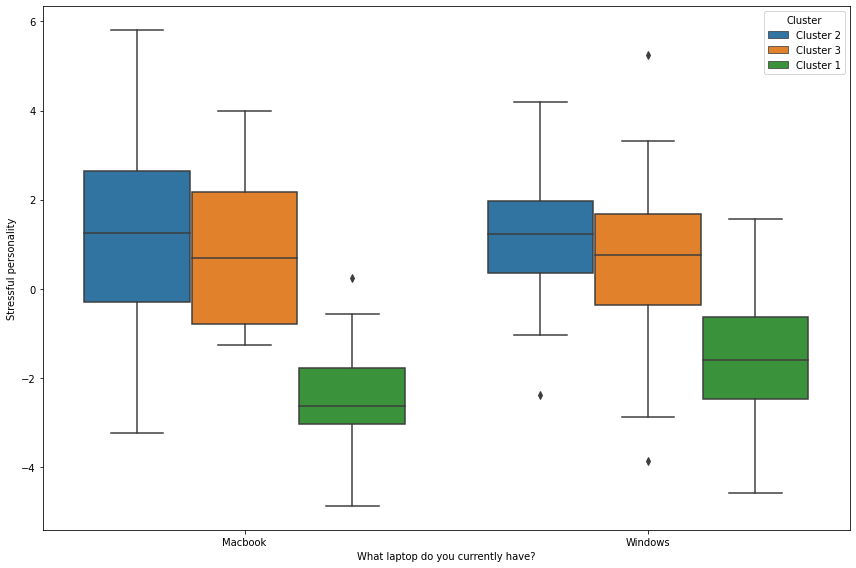

In [110]:
########################
# Future laptop
########################
# stress

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Stressful personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

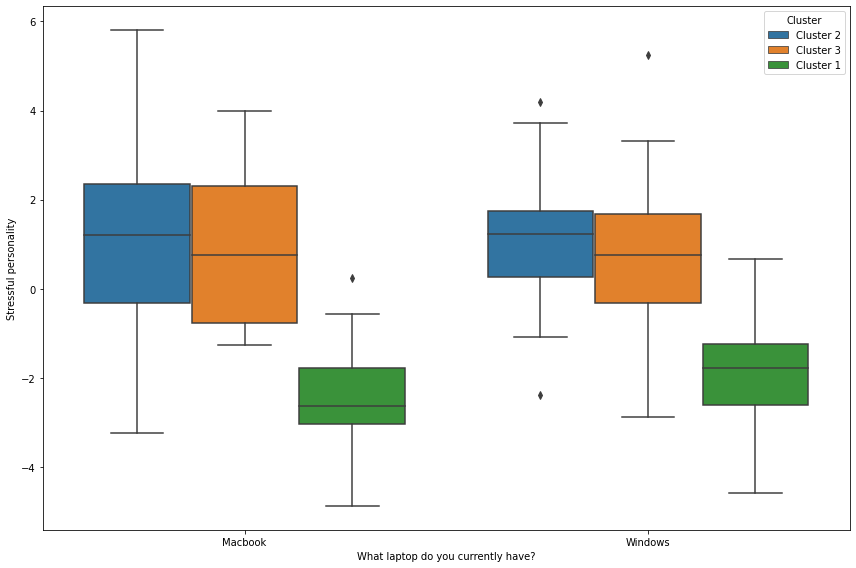

In [32]:
########################
# Future laptop
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Stressful personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

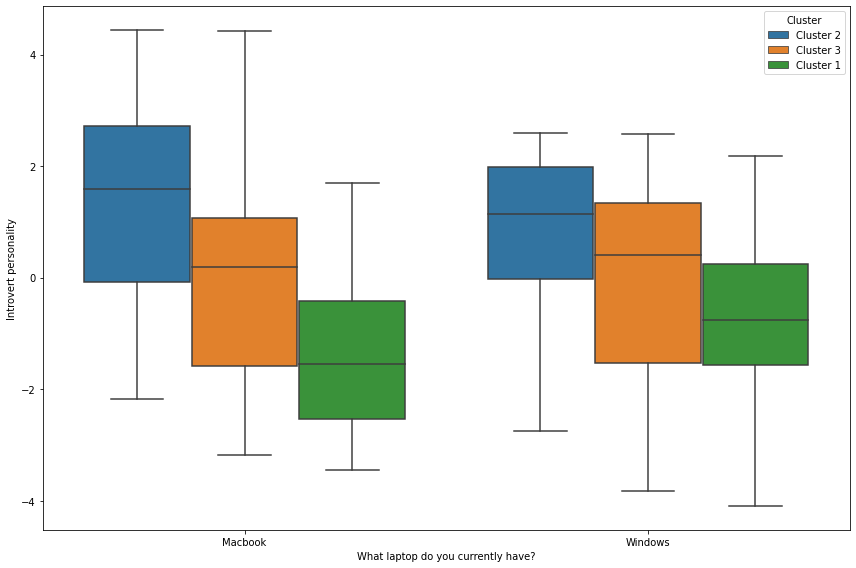

In [33]:
########################
# Future laptop
########################
# introvert

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Introvert personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

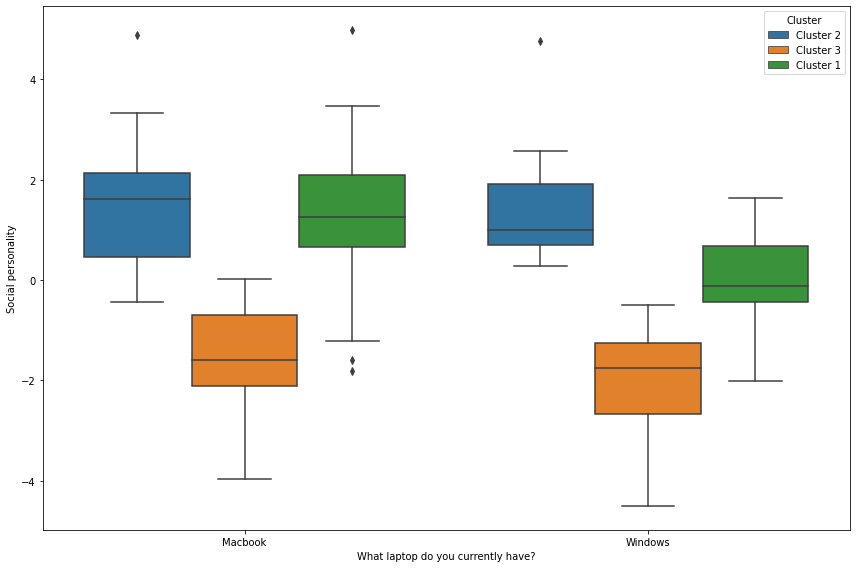

In [34]:
########################
# Future laptop
########################
# social

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Social personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

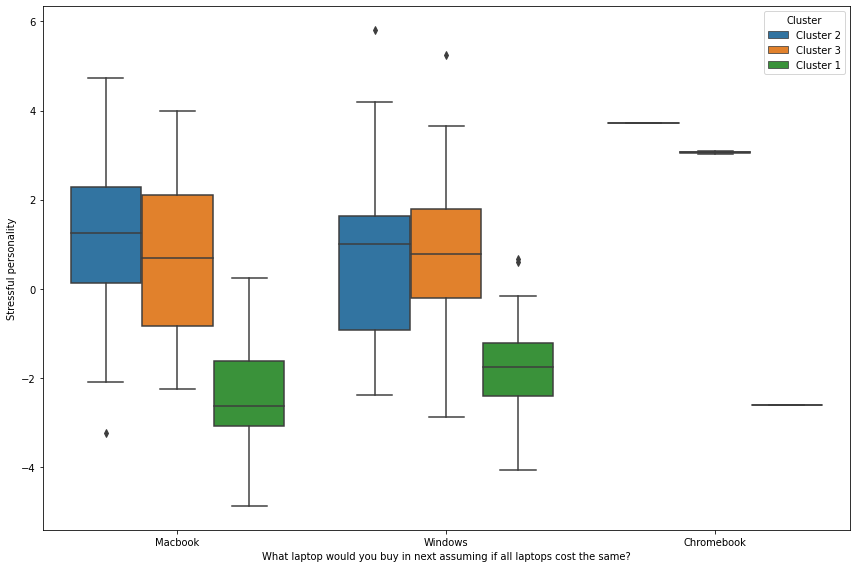

In [35]:
########################
# Future laptop
########################
# future

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Stressful personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

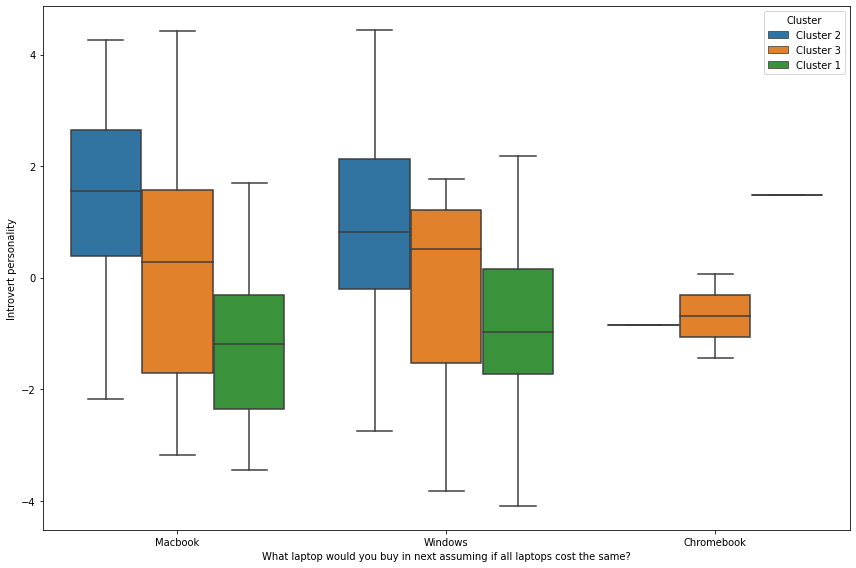

In [36]:
########################
# Future laptop
########################
# introvert

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Introvert personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

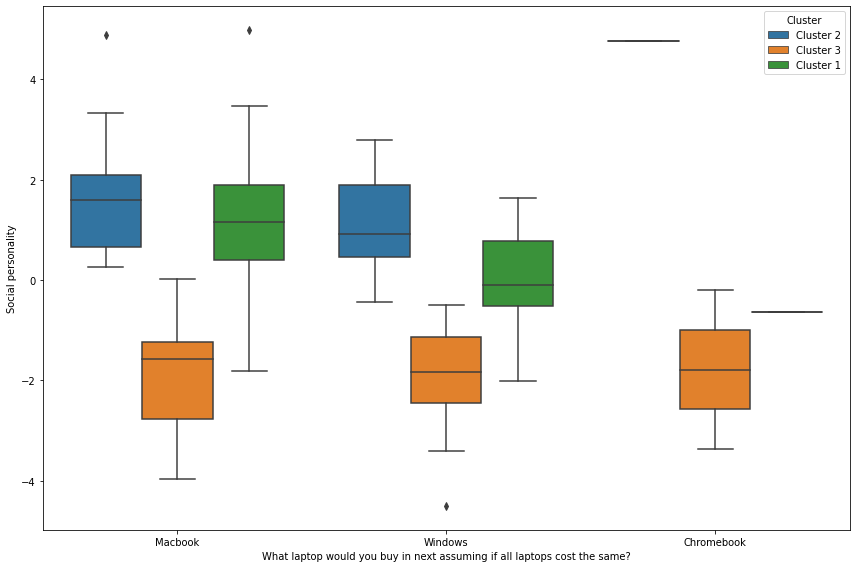

In [37]:
########################
# Future laptop
########################
# social

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Social personality',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>PCA HULT DNA</h2>
<br><br> 
    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

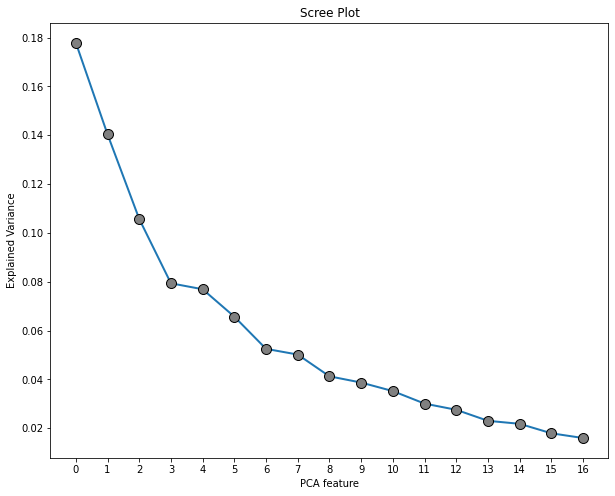

In [38]:
#Splitting for Hult
hult_dna = survey_df_new.iloc[:, 36:53]
hult_dna.head()

#Instantiating PCA object with no limit to principal components for HULT DNA
hult_dna_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
hult_dna_pca_fit = hult_dna_pca.fit_transform(hult_dna)

#Calling scree plot function
scree_plot(pca_object = hult_dna_pca)

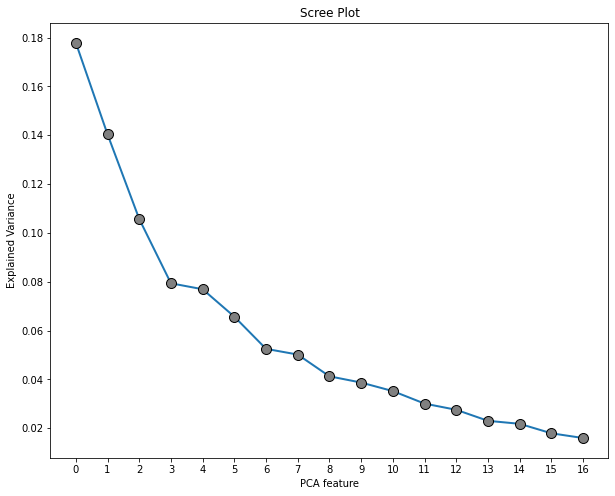

In [39]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(hult_dna)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [40]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the big_%
customer_pca_3 = pca_3.fit_transform(hult_dna)

In [41]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_6 = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_6 = factor_loadings_6.set_index(hult_dna.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(hult_dna.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                         0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34
Am the life of the party                               0.03 -0.26  0.26  0.13  0.14 -0.23  0.22 -0.12  0.02  0.28  0.40 -0.12 -0.08 -0.11  0.15 -0.05 -0.10 -0.08  0.23  0.11  0.12  0.19 -0.04 -0.12 -0.12  0.17 -0.05 -0.07 -0.24  0.05  0.14 -0.02 -0.08 -0.36  0.00
Feel little concern for others                         0.26 -0.16 -0.11  0.17 -0.06 -0.64 -0.28 -0.03  0.16  0.13 -0.13  0.30 -0.28  0.13 -0.06  0.15 -0.00  0.07  0.00 -0.01  0.19 -0.06  0.02  0.02  0.15  0.04 -0.00  0.01  0.06  0.09 -0.02 -0.11  0.04  0.11  0.01
Am always prepared                                    -0.11 -0.02 -0.04  0.14 -0.10 -0.11  0.25 -0.16  0.02  0.12 -0.02 -0.02 -0.22 -0.35 -0.04  

/opt/anaconda3/envs/notebook-6.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/opt/anaconda3/envs/notebook-6.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()


In [42]:
# naming each principal component
factor_loadings_3.columns = ['Lone Ranger',  # Blind Breakthrough
                             'Follower',     # Do what others do
                             'Conservative'] # Less new idea 


# checking the result
factor_loadings_3

,Lone Ranger,Follower,Conservative
Take time out for others,-0.157872,0.190505,-0.128610
Shirk my duties,0.303809,-0.045904,0.013363
Have frequent mood swings,0.550191,0.331835,0.003222
Use difficult words,-0.024958,0.224001,0.025093
Don't mind being the center of attention,-0.142139,0.397293,0.620741
Feel others' emotions,-0.148923,0.325149,-0.226342
Follow a schedule,-0.218603,0.184522,-0.020777
Get irritated easily,0.418895,0.335588,0.064761
Spend time reflecting on things,-0.150136,0.226672,-0.300073
Am quiet around strangers,0.160925,-0.152352,-0.499628


In [43]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(hult_dna)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_3.columns


# checking the results
X_pca_df

,Lone Ranger,Follower,Conservative
0,0.056945,-0.668520,0.766807
1,0.545607,0.034661,-1.170149
2,-0.479404,-0.707892,3.053278
3,2.385503,1.561163,-0.733000
4,2.046623,1.190743,1.189292
5,2.450375,0.139863,0.202031
6,1.907786,-0.086121,-0.409905
7,-2.558375,-0.658272,0.645322
8,0.412352,-1.749496,-0.834457
9,-2.881337,0.804058,0.730947


In [44]:
X_pca_df.to_excel('./analysis_results/PCA Factor Loadings2.xlsx',
                  index = False)

In [45]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Lone Ranger',         # Blind Breakthrough
                             'Follower',     # Do what others do
                             'Conservative'] # Less new idea 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Lone Ranger     3.021687
Follower        2.384239
Conservative    1.795416
dtype: float64 


Lone Ranger     1.0
Follower        1.0
Conservative    1.0
dtype: float64


/opt/anaconda3/envs/notebook-6.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/opt/anaconda3/envs/notebook-6.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


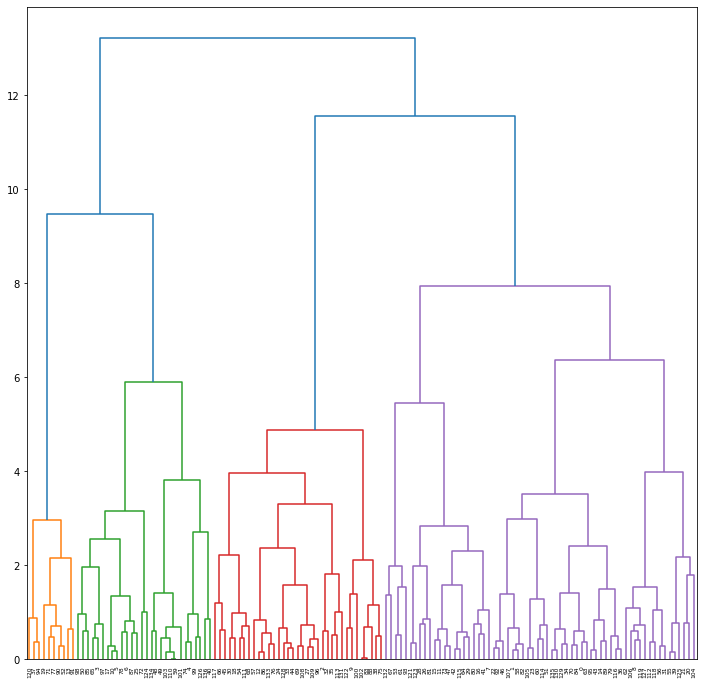

In [46]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

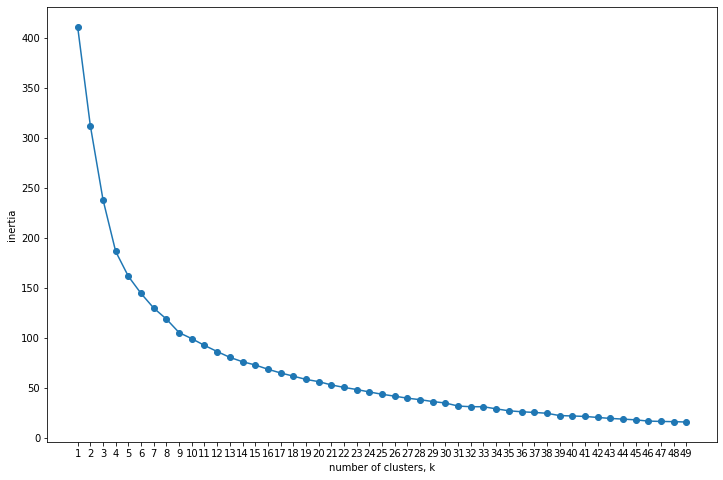

In [47]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [48]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    48
0    45
1    44
Name: Cluster, dtype: int64


In [49]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Lone Ranger', # Blind Breakthrough
                             'Follower', # Do what others do
                             'Conservative'] # Less new idea 

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Lone Ranger,Follower,Conservative
0,1.16,0.19,0.12
1,-0.71,0.42,0.75
2,-0.44,-0.57,-0.80


<br><h3>COMPARING DEMOGRAHPIC AND NON-DEMOGRAPHIC DATA</h3><br>

In [111]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df_2.loc[ : , ['What laptop do you currently have?',
                               'What laptop would you buy in next assuming if all laptops cost the same?',
                               'What program are you in?', 'Gender', 'What is your nationality? ',
                               'What is your ethnicity?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?',
                               'What laptop would you buy in next assuming if all laptops cost the same?',
                               'What program are you in?', 'Gender', 'What is your nationality? ',
                              'What is your ethnicity?',
                              'Cluster',
                              'Lone Ranger', # Blind Breakthrough
                             'Follower',     # Do what others do
                             'Conservative'] # Less new idea 


# checking the results
final_pca_clust_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Lone Ranger,Follower,Conservative
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,ecuador,Hispanic / Latino,1,-0.321166,0.862177,0.307601
1,Windows laptop,Windows laptop,One year Business Analytics,Male,Ecuador,Hispanic / Latino,2,1.268453,0.722979,-1.166859
2,Windows laptop,Windows laptop,One year Business Analytics,Male,Indian,West Asian / Indian,2,0.403473,-2.626472,-4.501573
3,Windows laptop,Windows laptop,One year Business Analytics,Female,indian,West Asian / Indian,1,1.354424,-0.947132,0.987248
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,China,Far east Asian,1,3.652729,-0.523069,0.488349
5,Macbook,Macbook,DD (MIB & Business Analytics),Male,Indian,West Asian / Indian,1,3.081362,2.670475,1.379028
6,Windows laptop,Macbook,DD (MIB & Business Analytics),Female,Dominican,Hispanic / Latino,1,2.579726,1.554747,0.829616
7,Windows laptop,Windows laptop,DD (MIB & Business Analytics),Female,Swiss,White / Caucasian,0,-2.063190,-1.560203,-0.423669
8,Macbook,Macbook,DD (MBA & Business Analytics),Male,Japan,Far east Asian,2,0.757132,1.205209,-1.441192
9,Windows laptop,Chromebook,DD (MBA & Business Analytics),Male,Costarrican,Hispanic / Latino,0,-2.614417,1.485509,-0.638421


In [51]:
# renaming
current_laptop_names = {1 : 'Macbook ',
                 'Windows laptop' : 'Windows'}

final_pca_clust_df['What laptop do you currently have?'].replace(current_laptop_names, inplace = True)

# renaming
future_laptop_names = {1 : 'Macbook ',
                 'Windows laptop' : 'Windows'}

final_pca_clust_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(future_laptop_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Lone Ranger,Follower,Conservative
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,ecuador,Hispanic / Latino,Cluster 2,0.056945,-0.668520,0.766807
1,Windows,Windows,One year Business Analytics,Male,Ecuador,Hispanic / Latino,Cluster 3,0.545607,0.034661,-1.170149
2,Windows,Windows,One year Business Analytics,Male,Indian,West Asian / Indian,Cluster 2,-0.479404,-0.707892,3.053278
3,Windows,Windows,One year Business Analytics,Female,indian,West Asian / Indian,Cluster 1,2.385503,1.561163,-0.733000
4,Macbook,Windows,DD (MBA & Disruptive innovation),Male,China,Far east Asian,Cluster 1,2.046623,1.190743,1.189292
5,Macbook,Macbook,DD (MIB & Business Analytics),Male,Indian,West Asian / Indian,Cluster 1,2.450375,0.139863,0.202031
6,Windows,Macbook,DD (MIB & Business Analytics),Female,Dominican,Hispanic / Latino,Cluster 1,1.907786,-0.086121,-0.409905
7,Windows,Windows,DD (MIB & Business Analytics),Female,Swiss,White / Caucasian,Cluster 2,-2.558375,-0.658272,0.645322
8,Macbook,Macbook,DD (MBA & Business Analytics),Male,Japan,Far east Asian,Cluster 3,0.412352,-1.749496,-0.834457
9,Windows,Chromebook,DD (MBA & Business Analytics),Male,Costarrican,Hispanic / Latino,Cluster 2,-2.881337,0.804058,0.730947


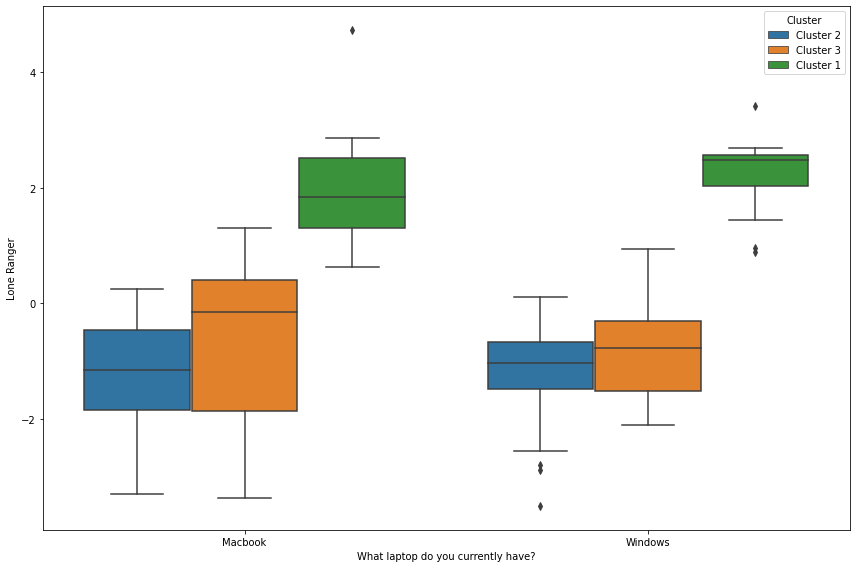

In [52]:
########################
# Future laptop
########################
# stress

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Lone Ranger',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

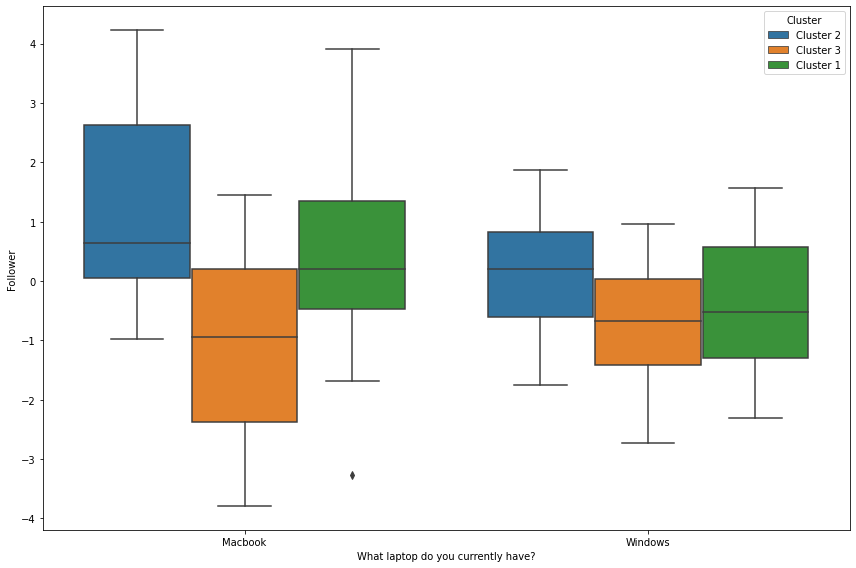

In [53]:
########################
# Future laptop
########################
# future

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

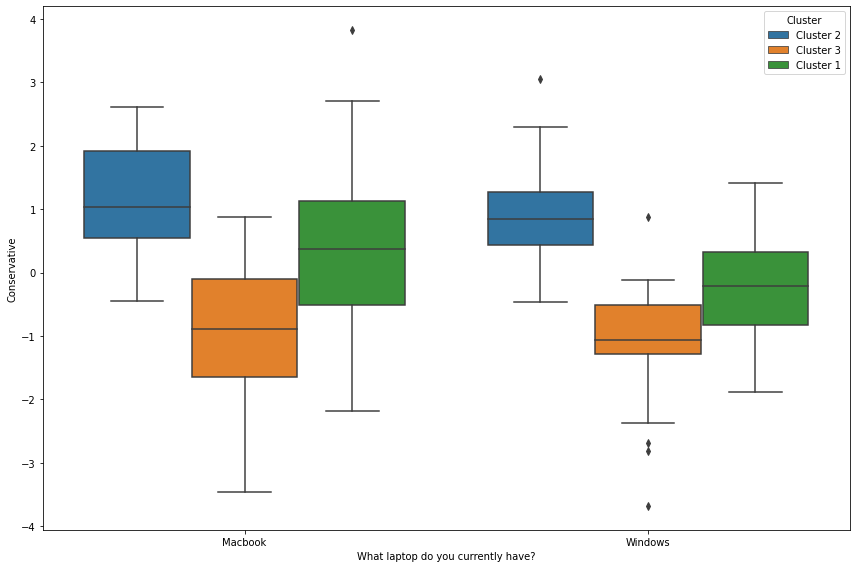

In [54]:
########################
# Future laptop
########################
# introvert

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Conservative',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

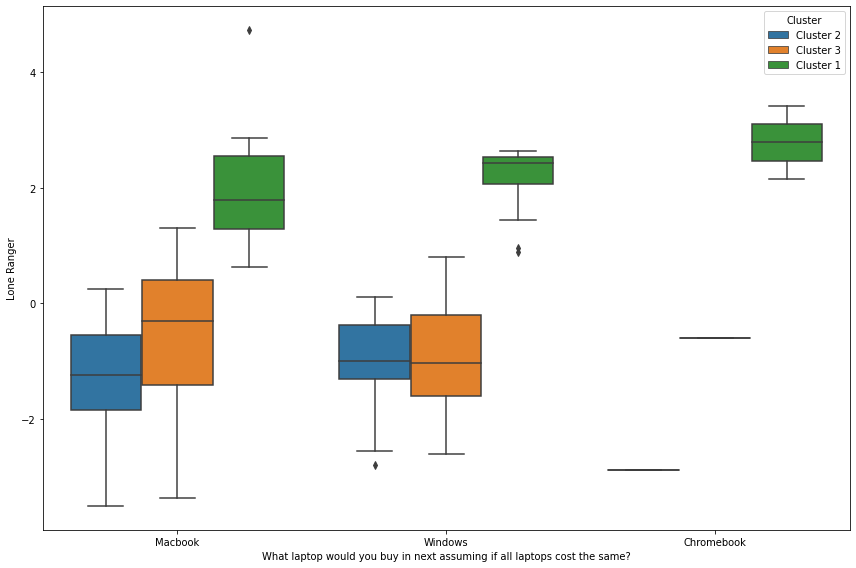

In [55]:
########################
# Future laptop
########################
# future

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Lone Ranger',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

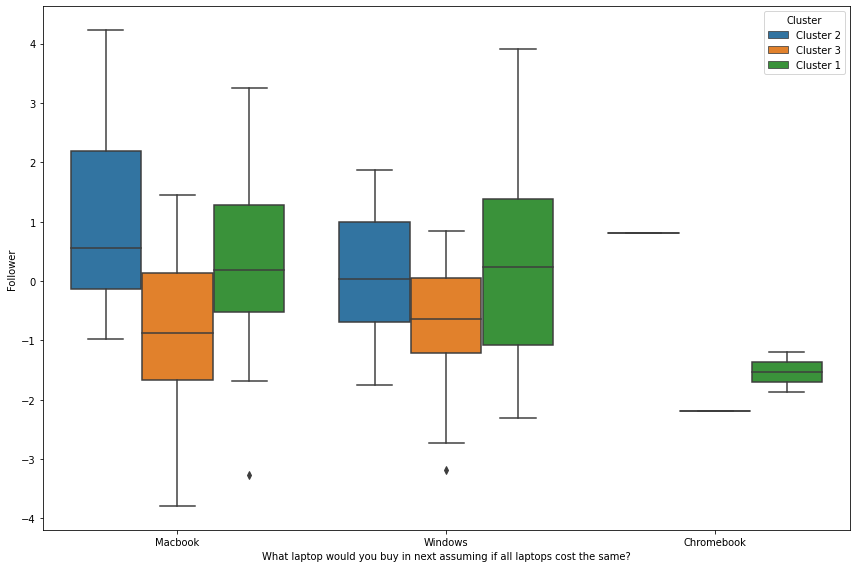

In [56]:
########################
# Future laptop
########################
# introvert

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

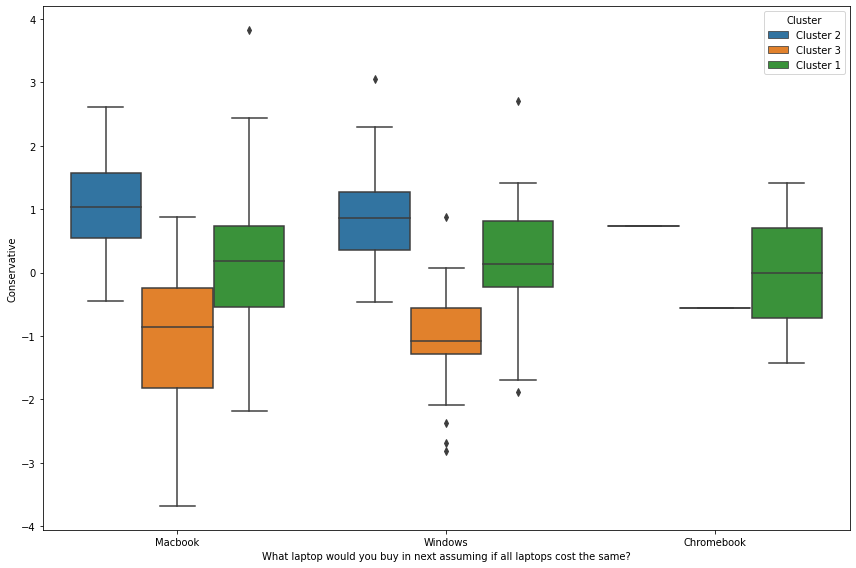

In [57]:
########################
# Future laptop
########################
# social

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y ='Conservative',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()